In [1]:
import pandas as pd
import os
import nltk

# Load the dataset
file_path = "./data/train_preprocess.csv"
df = pd.read_csv(file_path)

# Filter sentences where fuel is negative
negative_fuel_df = df[df['fuel'] == 'negative'][['sentence']]

# Display a sample of the filtered dataset
print(negative_fuel_df.head())
nltk_data_dir = "./nltk_data"
os.makedirs(nltk_data_dir, exist_ok=True)

# Download stopwords to the specified directory
nltk.download('stopwords', download_dir=nltk_data_dir)

                                              sentence
1    Avanza kenapa jadi boros bensin begini dah ah....
38   dari segi kenyamanan cortez oke lah, tapi baha...
113  kalau sudah di atas 120 km / jam boros banget ...
116          Rush konde konsumsi BBM yang tetap irit .
124  pengalaman saya punya avanza bahan bakar nya l...


[nltk_data] Downloading package stopwords to ./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import spacy
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the SpaCy Indonesian model
nlp = spacy.blank('id')
nlp.add_pipe('sentencizer')

def custom_tokenizer(text):
    return [token.text for token in nlp(text)]
def enhanced_tokenizer(text):
    # Remove stopwords and non-meaningful tokens
    from nltk.corpus import stopwords
    try:
        stop_words = set(stopwords.words('indonesian'))
    except:
        import nltk
        nltk.download('stopwords')
        stop_words = set(stopwords.words('indonesian'))
        
    # Your existing custom_tokenizer logic here, plus:
    tokens = custom_tokenizer(text)
    # Remove stopwords and very short tokens
    tokens = [
        token for token in tokens if token not in stop_words and 
len(token) > 2]
    return tokens

def textrank_summarizer(text, num_sentences=5):
    # Tokenize sentences
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]
    
    # Convert sentences to TF-IDF vectors
    vectorizer = TfidfVectorizer(tokenizer=enhanced_tokenizer, 
stop_words=None)
    tfidf_matrix = vectorizer.fit_transform(sentences)
    
    # Compute cosine similarity matrix
    similarity_matrix = cosine_similarity(tfidf_matrix)
    
    # Build the graph and rank sentences
    nx_graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(nx_graph)
    
    # Rank sentences by their TextRank score
    ranked_sentences = sorted(((scores[i], s) for i, s in 
enumerate(sentences)), reverse=True)
    
    # Create a DataFrame with sentence scores
    sentence_scores_df = pd.DataFrame(ranked_sentences, 
columns=["Score", "Sentence"])
    
    # Return summary and sentence scores
    summary = " ".join([sent for _, sent in 
ranked_sentences[:num_sentences]])
    
    return summary, sentence_scores_df

example_text = "semenjak saya pakai toyota calya dompet ku enggak lagi bocor alias bbm nya irit banget . dan enggak sering mengisi bbm lagi ."

print("Example Text:")
print(example_text)

# Tokenize the example text
# Display the example text
print("Tokenized Example Text:")
print(enhanced_tokenizer(example_text))

# Combine sentences into one large text for summarization
text = " ".join(negative_fuel_df['sentence'])
text

# Apply TextRank summarization
summary, sentence_scores = textrank_summarizer(text, 5)

# Display summary
print("Summary:")
print(summary)

# # Display sentence scores
sentence_scores.head() 




Example Text:
semenjak saya pakai toyota calya dompet ku enggak lagi bocor alias bbm nya irit banget . dan enggak sering mengisi bbm lagi .
Tokenized Example Text:
['semenjak', 'pakai', 'toyota', 'calya', 'dompet', 'bocor', 'alias', 'bbm', 'nya', 'irit', 'banget', 'mengisi', 'bbm']
Summary:
ampun deh punya xenia uang habis cuma buat konsumsi bensin livina di tempat gue bensin nya asli boros banget kalau soal ngelitik memang iya avanza bahan bakar nya boros banget pengalaman saya punya avanza bahan bakar nya lebih hemat daripada ketika saya punya xenia sudah harga nya mahal, fortuner ini juga konsumsi bahan bakar nya lumayan menguras dompet Asli avanza saya boros akhir-akhir ini walaupun secara keseluruha oke tapi kalo bensinnya boros jadi malas beli ertiga gaya nya oke banget, tarikan juga mantap dan bandel tapi sayang nya boros banget pakai new avanza bu . secara keseluruhan avanza bagus kecuali pemakaian bensin yang boros sekali Masa konsumsi bensin Toyota Avanza Veloz 12,5 liter per

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,Score,Sentence
0,0.126788,ampun deh punya xenia uang habis cuma buat kon...
1,0.115069,pengalaman saya punya avanza bahan bakar nya l...
2,0.109745,secara keseluruhan avanza bagus kecuali pemaka...
3,0.101881,"dari segi kenyamanan cortez oke lah, tapi baha..."
4,0.100000,Baru diisi sudah mau setengah saja .


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(negative_fuel_df['sentence'])

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

# Display similarity matrix
import pandas as pd
sim_df = pd.DataFrame(similarity_matrix, 
index=negative_fuel_df['sentence'], 
columns=negative_fuel_df['sentence'])
print(sim_df)

sentence                                            Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .  \
sentence                                                                                                                                  
Avanza kenapa jadi boros bensin begini dah ah. ...                                           1.000000                                     
dari segi kenyamanan cortez oke lah, tapi bahan...                                           0.013448                                     
kalau sudah di atas 120 km / jam boros banget a...                                           0.093155                                     
Rush konde konsumsi BBM yang tetap irit .                                                    0.000000                                     
pengalaman saya punya avanza bahan bakar nya le...                                           0.028798                                     
sudah harga nya mahal, fort

                                              sentence  cluster
762                avanza bahan bakar nya boros banget        0
38   dari segi kenyamanan cortez oke lah, tapi baha...        0
113  kalau sudah di atas 120 km / jam boros banget ...        0
157  sudah harga nya mahal, fortuner ini juga konsu...        0
342  walaupun secara keseluruha oke tapi kalo bensi...        0
385  ertiga gaya nya oke banget, tarikan juga manta...        0
394  yamaha lexi speed nya gila, tarikan nya juara,...        0
499  Grand Livina XV AT 2008 ngelitik nya parah kak...        0
448  xenia 1:8 - 9 boros juga ya juragan , karena b...        0
632  ampun deh punya xenia uang habis cuma buat kon...        1
626  Dari semua merek mobil yang pernah saya pakai ...        1
581                vario jauh lebih boros daripada mio        1
555  Ini gue saja yang merasa bensin Xenia boros ba...        1
1    Avanza kenapa jadi boros bensin begini dah ah....        1
418  Masa konsumsi bensin Toyota Avanza 

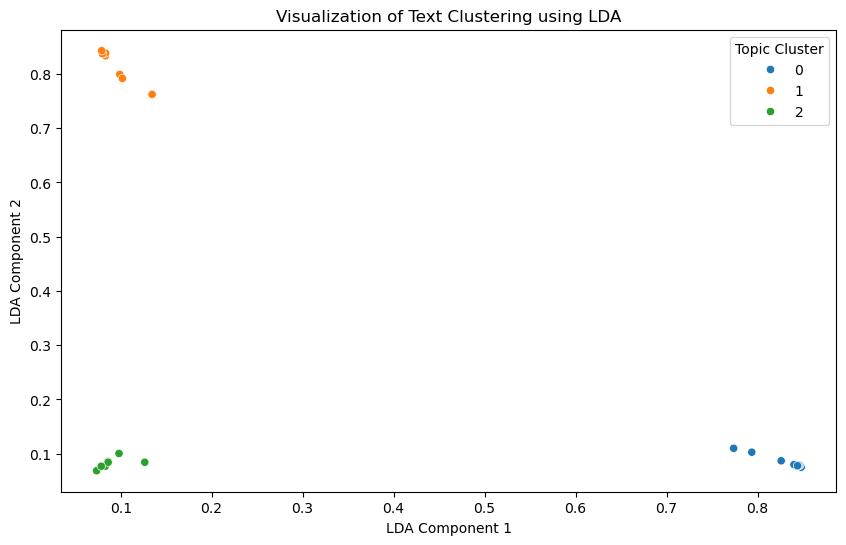

In [4]:
from sklearn.cluster import KMeans

# Choose number of clusters (can be adjusted)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
negative_fuel_df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Display clustered sentences
print(negative_fuel_df[['sentence', 
'cluster']].sort_values(by='cluster'))

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation

# Perform LDA for topic modeling
num_topics = 3  # Adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, 
random_state=42)
lda_matrix = lda.fit_transform(tfidf_matrix)

# Assign the most probable topic to each sentence
negative_fuel_df['LDA_Topic'] = np.argmax(lda_matrix, axis=1)

# Visualize the clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lda_matrix[:, 0], y=lda_matrix[:, 1], 
hue=negative_fuel_df['LDA_Topic'], palette="tab10")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("Visualization of Text Clustering using LDA")
plt.legend(title="Topic Cluster")
plt.show()

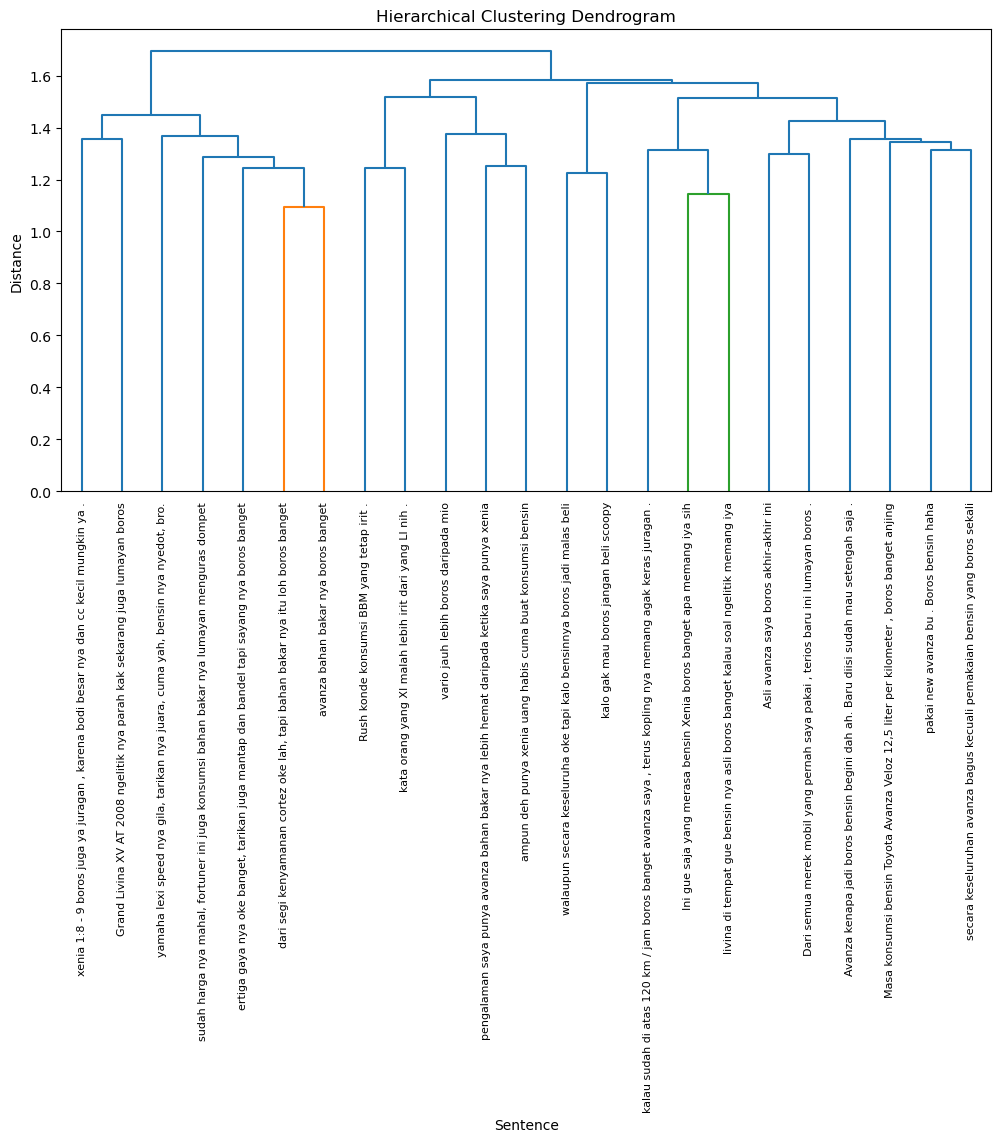

In [5]:
# Function to display the top words for each topic
def display_topics(model, feature_names, num_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx}"] = [feature_names[i] for i in 
topic.argsort()[:-num_words - 1:-1]]
    
    # Convert topics to a DataFrame for display
    topics_df = pd.DataFrame(topics)
    
    return topics_df

# Get feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the top words in each topic
topics = display_topics(lda, feature_names)
topics.head()

{"columns":[{"name":"index","rawType":"int64","type":"integer"}, 
            {"name":"Topic 0","rawType":"object","type":"string"},
            {"name":"Topic 1","rawType":"object","type":"string"},
            {"name":"Topic 2","rawType":"object","type":"string"}],
            "conversionMethod":"pd.DataFrame","ref":"25b8986a-72e9-4410-be4c-77b24184e92a",
            "rows":[["0","nya","boros","punya"],["1","avanza","juga","memang"],
            ["2","boros","nya","xenia"],["3","bakar","ya","yang"],
            ["4","bahan","oke","saya"]],"shape":{"columns":3,"rows":5}}

# Function to display the top words for each topic per cluster
def display_cluster_topics(model, feature_names, num_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx}"] = [feature_names[i] for i in 
topic.argsort()[:-num_words - 1:-1]]
    
    # Convert topics to a DataFrame for display
    topics_df = pd.DataFrame(topics)

    # Associate topics with clusters
    cluster_topics = negative_fuel_df[['sentence', 'LDA_Topic']].copy()
    cluster_topics['Topic Words'] = cluster_topics['LDA_Topic'].apply(lambda x: ", ".join(topics_df[f"Topic {x}"]))
    
    return cluster_topics

# Get feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the top words in each topic per cluster
topic_cluster = display_cluster_topics(lda, feature_names)
topic_cluster.head()

{"columns": [{"name":"index","rawType":"int64","type":"integer"},
             {"name":"sentence","rawType":"object","type":"string"},
             {"name":"LDA_Topic","rawType":"int64","type":"integer"},
             {"name":"Topic Words","rawType":"object","type":"string"}],
             "conversionMethod":"pd.DataFrame","ref":"df593378-50f2-4a49-ad11-2f8b08609634","rows":
             [["1","Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .","0","nya, avanza, boros, bakar, bahan, banget, akhir, bensin, ini, baru"],
              ["38","dari segi kenyamanan cortez oke lah, tapi bahan bakar nya itu loh boros banget","0","nya, avanza, boros, bakar, bahan, banget, akhir, bensin, ini, baru"],
              ["113","kalau sudah di atas 120 km / jam boros banget avanza saya , terus kopling nya memang agak keras juragan .","2","punya, memang, xenia, yang, saya, gue, iya, bensin, banget, kalau"],
              ["116","Rush konde konsumsi BBM yang tetap irit .","1","boros, juga, nya, ya, oke, tapi, dan, mio, vario, jauh"],
              ["124","pengalaman saya punya avanza bahan bakar nya lebih hemat daripada ketika saya punya xenia", "2", "punya, memang, xenia, yang, saya, gue, iya, bensin, banget, kalau"]], "shape":
              {"columns": 3, "rows": 5}}

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = sch.linkage(tfidf_matrix.toarray(), method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(
    linkage_matrix,
    labels=negative_fuel_df['sentence'].values,
    leaf_rotation=90,
    leaf_font_size=8
)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sentence")
plt.ylabel("Distance")
plt.show()

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

def plot_word_clouds(model, feature_names, num_words=10):
    fig, axes =  plt.subplots(1, model.n_components, figsize=(15, 5))
    for topic_idx, topic in enumerate(model.components_):
        word_freqs = {feature_names[i]: topic[i] for i in topic.argsort()[:-num_words - 1:-1]}
        wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_freqs)
        axes[topic_idx].imshow(wordcloud, interpolation='bilinear')
        axes[topic_idx].axis("off")
        axes[topic_idx].set_title(f"Topic {topic_idx}")
    plt.suptitle("Topic Word Clouds")
    plt.show()

def plot_top_words(model, feature_names, num_words=10):
    fig, axes = plt.subplots(1, model.n_components, figsize=(15, 5), sharex=True)
    for topic_idx, topic in enumerate(model.components_):
        top_features_indices = topic.argsort()[:-num_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_indices]
        top_weights = topic[top_features_indices]
        
        axes[topic_idx].barh(top_features, top_weights, color='skyblue')
        axes[topic_idx].invert_yaxis()
        axes[topic_idx].set_title(f"Topic {topic_idx}")

    plt.suptitle("Top Words in Each Topic")
    plt.show()

# Get feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()
 # Plot word clouds and top words for topics
plot_word_clouds(lda, feature_names)
plot_top_words(lda, feature_names)

ModuleNotFoundError: No module named 'wordcloud'